Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks")

In [4]:
path='/content/gdrive/My Drive/Colab Notebooks/CNN_Skin'

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

data_dir_train = pathlib.Path(path+'/Train')
data_dir_test = pathlib.Path(path+'/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, labels='inferred', label_mode='int',class_names=None, color_mode='rgb', batch_size=batch_size, image_size=(img_height,img_width), shuffle=True, seed=123, validation_split=0.2, subset='training',interpolation='bilinear', follow_links=False, smart_resize=False)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, labels='inferred', label_mode='int',class_names=None, color_mode='rgb', batch_size=batch_size, image_size=(img_height,img_width), shuffle=True, seed=123, validation_split=0.2, subset='validation',interpolation='bilinear', follow_links=False, smart_resize=False)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


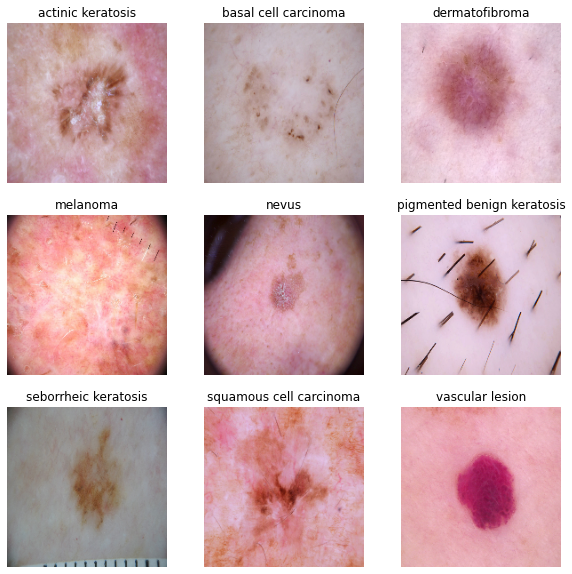

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for j in range (0, len(class_names)):
    for i in range(0,32):
      if class_names[labels[i]]==class_names[j]:
        ax = plt.subplot(3, 3, j+1)
        plt.title(class_names[labels[i]])
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


for image_batch, labels_batch in val_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)


`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
### Your code goes here

num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [17]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 21s 97ms/step - loss: 2.0403 - accuracy: 0.2176 - val_loss: 1.8336 - val_accuracy: 0.3378
Epoch 2/20
56/56 [==============================] - 1s 22ms/step - loss: 1.7086 - accuracy: 0.3878 - val_loss: 1.8387 - val_accuracy: 0.3199
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 1.5323 - accuracy: 0.4688 - val_loss: 1.4438 - val_accuracy: 0.5145
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4215 - accuracy: 0.5156 - val_loss: 1.5048 - val_accuracy: 0.4787
Epoch 5/20
56/56 [==============================] - 1s 22ms/step - loss: 1.3559 - accuracy: 0.5223 - val_loss: 1.3974 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2656 - accuracy: 0.5469 - val_loss: 1.3493 - val_accuracy: 0.5347
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.2149 - accuracy: 0.5859 - val_loss: 1.5692 - val_accuracy: 0.4877
Epoch 8/20
5

### Visualizing training results

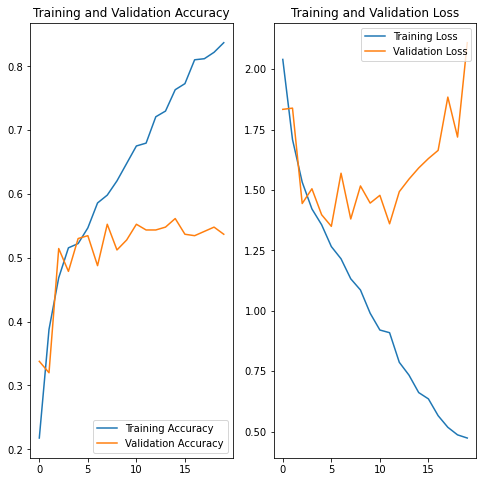

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

##### As we can see from above plot, the **Training accuracy** and **Validation accuracy** are off by a huge margin and the model has achieved only around 53% accuracy on the validation set and has a higher validation loss ( with an increasing trend).

##### Since there is a significant difference between the training accuracy and validation accuracy hence it is a sign of overfitting which means model would have hard time generalizing on a new dataset.

##### We could treat the overfitting issues using various methods such as data augmentation methods and adding Dropout to our model.

### Todo:
### Create the model, compile and train the model


In [19]:
num_classes = 9

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  #layers.experimental.preprocessing.RandomRotation(0.2),
  #layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.Resizing(img_height, img_width)

])

model = Sequential([data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])



### Compiling the model

In [20]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 3s 29ms/step - loss: 2.0798 - accuracy: 0.1814 - val_loss: 2.0331 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 1s 25ms/step - loss: 2.0367 - accuracy: 0.2115 - val_loss: 2.0392 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 1s 25ms/step - loss: 1.8907 - accuracy: 0.3147 - val_loss: 1.7829 - val_accuracy: 0.3490
Epoch 4/20
56/56 [==============================] - 1s 25ms/step - loss: 1.7706 - accuracy: 0.3610 - val_loss: 1.7997 - val_accuracy: 0.3378
Epoch 5/20
56/56 [==============================] - 1s 25ms/step - loss: 1.7093 - accuracy: 0.3689 - val_loss: 1.6634 - val_accuracy: 0.4139
Epoch 6/20
56/56 [==============================] - 1s 25ms/step - loss: 1.6488 - accuracy: 0.4012 - val_loss: 1.6425 - val_accuracy: 0.4027
Epoch 7/20
56/56 [==============================] - 1s 25ms/step - loss: 1.6112 - accuracy: 0.3873 - val_loss: 1.5858 - val_accuracy: 0.4318
Epoch 8/20
56

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 45, 45, 32)       

### Visualizing the results

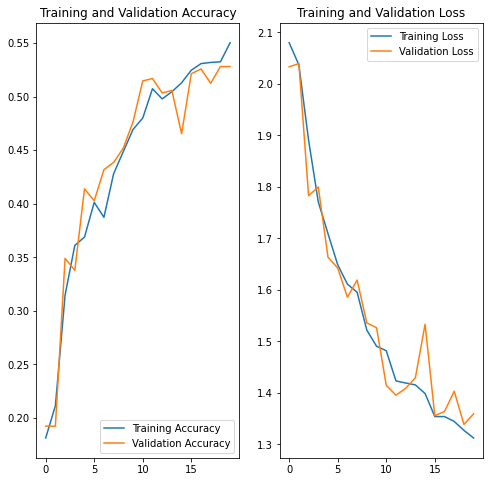

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Although, the overall training accuracy has decreased, however we could see that the difference between the **Training and Validation accuracy** has decreased as well which would in return indicates that overfitting has reduced. Additionally, the validation loss has also decreased. 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [25]:
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [26]:
lesion_list = [os.path.basename(os.path.basename(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [27]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/My Drive/Colab Notebooks/CNN_S...,actinic keratosis
1,/content/gdrive/My Drive/Colab Notebooks/CNN_S...,actinic keratosis
2,/content/gdrive/My Drive/Colab Notebooks/CNN_S...,actinic keratosis
3,/content/gdrive/My Drive/Colab Notebooks/CNN_S...,actinic keratosis
4,/content/gdrive/My Drive/Colab Notebooks/CNN_S...,actinic keratosis
...,...,...
2234,/content/gdrive/My Drive/Colab Notebooks/CNN_S...,vascular lesion
2235,/content/gdrive/My Drive/Colab Notebooks/CNN_S...,vascular lesion
2236,/content/gdrive/My Drive/Colab Notebooks/CNN_S...,vascular lesion
2237,/content/gdrive/My Drive/Colab Notebooks/CNN_S...,vascular lesion


In [28]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64


#### - The class with the least number of samples ---> **seborrheic keratosis**
#### - The classes which dominate the data in terms proportionate number of samples :
1.   **pigmented benign keratosis**
2.   **melanoma**




#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset='/content/gdrive/My Drive/Colab Notebooks/CNN_Skin/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(600) ## We are adding 600 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/600 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_Skin/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB8EC6137D0>: 100%|██████████| 600/600 [00:27<00:00, 21.60 Samples/s]
Executing Pipeline:   0%|          | 0/600 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_Skin/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB8EC026290>: 100%|██████████| 600/600 [00:27<00:00, 21.96 Samples/s]
Executing Pipeline:   0%|          | 0/600 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_Skin/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB8EC601E10>: 100%|██████████| 600/600 [00:28<00:00, 20.79 Samples/s]
Executing Pipeline:   0%|          | 0/600 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_Skin/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB8EC601B10>: 100%|██████████| 600/600 [02:10<00:00,  4.61 Samples/s]
Executing Pipeline:   0%|          | 0/600 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_Skin/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FB8EC043710>: 100%|██████████| 600/600 [01:58<00:00,  5.06 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB8D80A4410>:   0%|          | 1/600 [00:00<01:17,  7.73 Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_Skin/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB8D8120CD0>: 100%|██████████| 600/600 [00:28<00:00, 21.40 Samples/s]
Executing Pipeline:   0%|          | 0/600 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_Skin/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB8D819A450>: 100%|██████████| 600/600 [00:59<00:00, 10.01 Samples/s]
Executing Pipeline:   0%|          | 0/600 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_Skin/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB8D80F9210>: 100%|██████████| 600/600 [00:28<00:00, 21.39 Samples/s]
Executing Pipeline:   0%|          | 0/600 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_Skin/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB8D80DCA50>: 100%|██████████| 600/600 [00:27<00:00, 21.76 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

5400


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [34]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [36]:
new_df['Label'].value_counts()

pigmented benign keratosis    1062
melanoma                      1038
basal cell carcinoma           976
nevus                          957
squamous cell carcinoma        781
vascular lesion                739
actinic keratosis              714
dermatofibroma                 695
seborrheic keratosis           677
Name: Label, dtype: int64

So, now we have added 600 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [37]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [38]:
data_dir_train=pathlib.Path(path+"/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7639 files belonging to 9 classes.
Using 6112 files for training.


#### **Todo:** Create a validation dataset

In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7639 files belonging to 9 classes.
Using 1527 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [40]:
model = Sequential([data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])




#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [41]:
## your code goes here

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [42]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/30
191/191 [==============================] - 44s 220ms/step - loss: 2.0518 - accuracy: 0.2163 - val_loss: 1.6875 - val_accuracy: 0.3445
Epoch 2/30
191/191 [==============================] - 43s 218ms/step - loss: 1.6951 - accuracy: 0.3451 - val_loss: 1.6600 - val_accuracy: 0.3982
Epoch 3/30
191/191 [==============================] - 41s 211ms/step - loss: 1.5676 - accuracy: 0.3914 - val_loss: 1.3882 - val_accuracy: 0.4499
Epoch 4/30
191/191 [==============================] - 42s 212ms/step - loss: 1.4707 - accuracy: 0.4247 - val_loss: 1.3322 - val_accuracy: 0.4898
Epoch 5/30
191/191 [==============================] - 42s 216ms/step - loss: 1.4407 - accuracy: 0.4496 - val_loss: 1.4568 - val_accuracy: 0.4460
Epoch 6/30
191/191 [==============================] - 42s 216ms/step - loss: 1.3873 - accuracy: 0.4642 - val_loss: 1.2974 - val_accuracy: 0.5095
Epoch 7/30
191/191 [==============================] - 42s 216ms/step - loss: 1.3544 - accuracy: 0.4755 - val_loss: 1.2823 - val_ac

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 45, 45, 64)       

#### **Todo:**  Visualize the model results

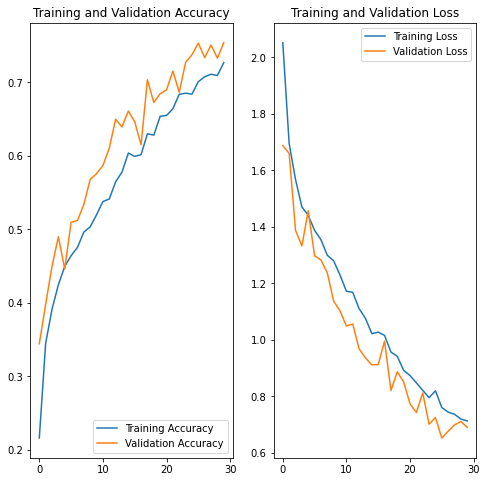

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### We could see that Overfitting has drastically reduced and the model accuracy has improved after adding data augmentation techniques and dropout technique.

#### However, we did notice that the **Validation accuracy** was more than **Training accuracy** which could be due to either of the following reasons:


1.   Use of dropout technique which disable certain percentage neurons while training.
2.   Maybe the validation set isn't very well representative of the train dataset/less complex or maybe contains some class imbalance.


